In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error



In [18]:
data=pd.read_csv("/kaggle/input/mydata/MYDATA.csv")

# data preprocessing


In [19]:

# Define the input features
num_features = ['age', 'MarketValue', 'Fee', 'YearOfTranfert', 'Height', 'Squad', 'Appearances', 'Goals', 'Assists', 'OwnGoals', 'SubsON', 'SubsOFF', 'YellowCards', 'SecondYellowCards', 'RedCards', 'PenaltyGoals', 'MinutesPerGoal', 'MinutesPlayed']
cat_features = ['position', 'Country', 'PreviousTeam', 'LeagueOfPreviousTeam', 'CountryOfPreviousTeam', 'NewTeam', 'LeagueOfNewTeam', 'CountryOfNewTeam']


In [40]:

# Define the input features
X = data.drop(['name', 'PPG'], axis=1)
y = data['PPG']*data['Appearances']*data['MarketValue']*data['Goals']*data['Assists']#*data['Fee']

# Encode the categorical features
cat_encoders = {}
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    X[feature] = cat_encoders[feature].fit_transform(X[feature])



In [41]:
X.NewTeam.value_counts()
#data.NewTeam.value_counts()

705     256
1380    191
27      189
60      178
1364    170
       ... 
1265      1
48        1
190       1
1182      1
1110      1
Name: NewTeam, Length: 1499, dtype: int64

In [42]:
X=X.drop('PlaceOfBirth',axis=1)
X=X.drop('Unnamed: 0',axis=1)

In [43]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model
rf_model = RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
print("Random Forest Regression R^2 Score:", rf_model.score(X_test, y_test))



Random Forest Regression R^2 Score: 0.8795456299349338


In [81]:
new_data = pd.DataFrame({
    'age': [25],
    'position': ['Central Midfield'],
    'Country': [''],
    'MarketValue': [30],
    'PreviousTeam': [''],
    'LeagueOfPreviousTeam': [''],
    'CountryOfPreviousTeam': [''],
    'Fee': [45],
    'YearOfTranfert': [2024],
    'NewTeam': ['Liverpool'],
    'LeagueOfNewTeam': ['Premier League'],
    'CountryOfNewTeam': ['England'],
    'Height': [180],
    'Squad': [46],
    'Appearances': [46],
    #'PPG': [0.9],
    'Goals': [5],
    'Assists': [7],
    'OwnGoals': [0],
    'SubsON': [0],
    'SubsOFF': [9],
    'YellowCards': [5],
    'SecondYellowCards': [0],
    'RedCards': [0],
    'PenaltyGoals': [8],
    'MinutesPerGoal': [200],
    'MinutesPlayed': [3500]
})
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    new_data[feature] = cat_encoders[feature].fit_transform(new_data[feature])



In [82]:
# Make predictions
rf_predictions = rf_model.predict(new_data)
print(rf_predictions)

[46002.01848754]


In [83]:
"""for feature in cat_features:
  encoder = LabelEncoder()
  new_data[feature] = encoder.fit_transform(new_data[feature])

new_player_pred = rf_model.predict(new_data)
print("Predicted player name:", new_player_pred[0])"""

'for feature in cat_features:\n  encoder = LabelEncoder()\n  new_data[feature] = encoder.fit_transform(new_data[feature])\n\nnew_player_pred = rf_model.predict(new_data)\nprint("Predicted player name:", new_player_pred[0])'

In [84]:
#X_test_encoded = pd.DataFrame(index=X_test.index)
X_test_encoded=X
# Encode the categorical features in X_test
for feature in cat_features:
    encoder = LabelEncoder()
    X_test_encoded[feature] = encoder.fit_transform(X_test_encoded[feature])

# Concatenate the encoded X_test with the numeric X_test
#X_test_all = pd.concat([X_test_encoded, X_test[num_features]], axis=1)

# Get the predicted PPG values for all players in X_test
predicted_ppg = rf_model.predict(X_test_encoded)

# Find the index of the player in X_test with the closest predicted PPG to new_data
closest_indices = np.argsort(abs(predicted_ppg - rf_model.predict(new_data)))[:500]
print(closest_indices)


[ 1876 14463 23109 13338 11286   400 10828 20050    30  8871 19448 10800
  7487  3943 15876  2113 25748  3503 22670  9300  5481 19302  5728  5583
   292 25732  1925  7291 19442  2302  1888  7425 10826 25697 12390  1880
    54 17768  9025 24192 24191 19815  5472 15792 25709 17619 19303 17620
  2105   434 27222 20897  5596 10657 24161 12562 12563 12504 20939 14149
 21158   347  8892 10796 22581 14319 12753    14 10629 12605 14346  7378
 10816  9059  7843  3979  7420  1904  8848 17681 24207  7307 27272  9897
    32  7809  3867 24171 10768 29423 24163 24168 15800 22552  3731 22538
 17671  5474 21583   310  3789 14125    77 10633  2291   605    67  5543
 14533  7138  2095  7149  1895    41 12437  7815 17883  5496 17615   580
 12419  4825 17523 23317 19513 20986 15925 25707 10772 17747 14311   617
 27239 15873  2130 15884  5643  3815    28 19291 25724  4937  5581  8188
  8113  9833 14062  6117  8128  8402 21550  9947  5500  7159  3738 20931
 15758  7120 14348 29523 24774  8525     5 19203 19

In [86]:
# Get the name of the closest player and print it out as the recommendation
print("Top 3 Recommendations:")
for i in closest_indices:
    if(data.iloc[i]['age']<=25 and data.iloc[i]['position']=='Central Midfield' and data.iloc[i]['YearOfTranfert'] in [2022,2021,2020,2019,2018,2017]):
        print(data.iloc[i]['name'])


Top 3 Recommendations:
Matheus Nunes 
Alex Oxlade-Chamberlain 
Tanguy Ndomb?? 
Ryan Gravenberch 
Peter Zulj 
Enzo Fern?dez 
Leon Goretzka 
Fred 
Corentin Tolisso 
Eduardo Camavinga 
Tanguy Ndomb?? 
Mateo Kovacic 
Giovani Lo Celso 
Giovani Lo Celso 
Giovani Lo Celso 
Arthur Melo 
Tanguy Ndomb?? 
Giovani Lo Celso 
Adrien Rabiot 
Yves Bissouma 
Franck Kessi? 
Franck Kessi? 


In [28]:
type(closest_indices)

numpy.ndarray

# The most import features

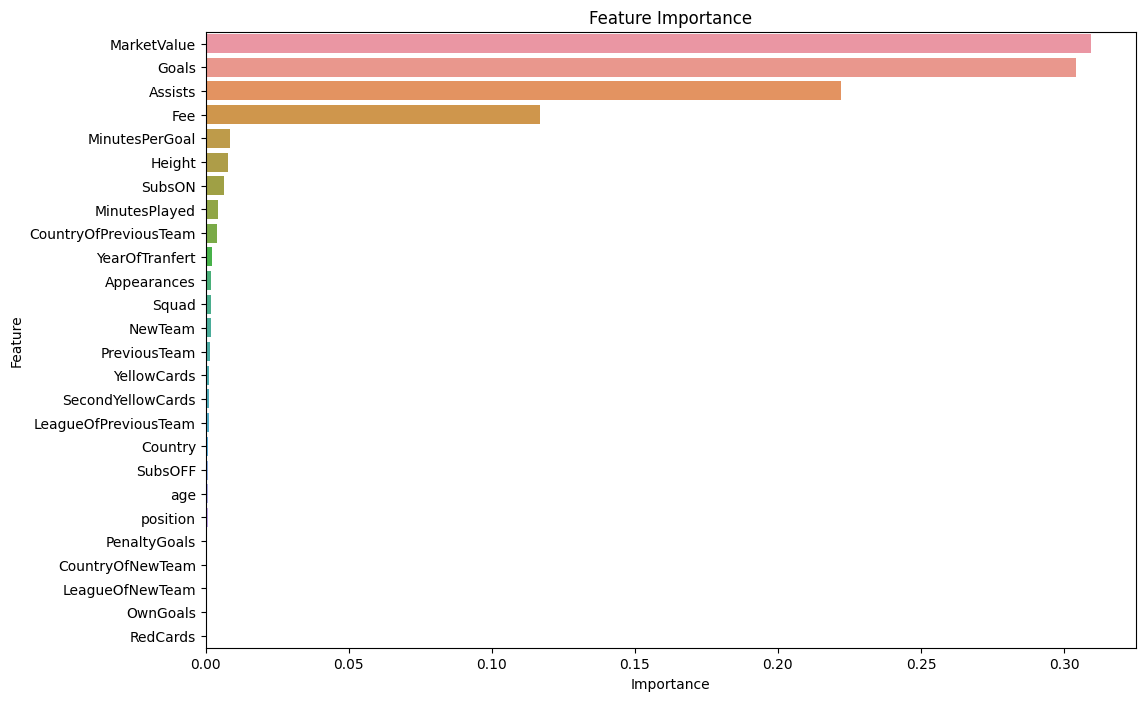

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get names of the features
feature_names = X.columns

# Create a datafr%ame with feature names and importance scores
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort the dataframe by importance score in descending order
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot the feature importance using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [30]:
print(data.position.value_counts())
print(X.position.value_counts())

Centre-Forward        7179
Centre-Back           5006
Central Midfield      3405
Attacking Midfield    2816
Defensive Midfield    2791
Right Winger          2047
Left Winger           2027
Left-Back             1807
Right-Back            1728
Second Striker         476
Left Midfield          359
Right Midfield         359
Attack                  32
Midfield                17
Defence                 12
Sweeper                  5
Name: position, dtype: int64
4     7179
3     5006
2     3405
1     2816
6     2791
12    2047
8     2027
9     1807
13    1728
14     476
7      359
11     359
0       32
10      17
5       12
15       5
Name: position, dtype: int64


# Best Hyperparameters

In [31]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf_model = RandomForestRegressor()

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model found by the grid search
best_rf_model = grid_search.best_estimator_
"""

'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Create a Random Forest Regressor object\nrf_model = RandomForestRegressor()\n\n# Define a grid of hyperparameters to search over\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 5, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Create a GridSearchCV object and fit it to the data\ngrid_search = GridSearchCV(rf_model, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found by the grid search\nprint("Best hyperparameters:", grid_search.best_params_)\n\n# Get the best model found by the grid search\nbest_rf_model = grid_search.best_estimator_\n'